In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,  roc_auc_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Tess1.csv")

In [4]:
df

,loc_rowid,tfopwg_disp,st_pmra,st_pmraerr1,st_pmraerr2,st_pmralim,st_pmdec,st_pmdecerr1,st_pmdecerr2,st_pmdeclim,...,eqtpos,eqtneg,tmagpos,tmagneg,distpos,distneg,teffpos,teffneg,radpos,radneg
0,1,FP,-5.964,0.085,-0.085,0,-0.076,0.072,-0.072,0,...,3127.204052,3127.204052,9.617000,9.591000,497.6865,473.7835,10513.7,9984.3,2.242433,2.097287
1,2,PC,-4.956,0.102,-0.102,0,-15.555,0.072,-0.072,0,...,4045.000000,4045.000000,9.429440,9.417440,301.7720,289.9520,7196.4,6943.6,2.100000,1.920000
2,3,FP,-1.462,0.206,-0.206,0,-2.249,0.206,-0.206,0,...,2037.000000,2037.000000,9.357501,9.241501,1049.4420,836.7760,9048.0,8800.0,5.730000,5.730000
3,4,FP,-0.939,0.041,-0.041,0,1.640,0.055,-0.055,0,...,1631.000000,1631.000000,9.337300,9.263300,9627.7400,5828.6000,5955.5,4821.5,0.000000,0.000000
4,5,FP,-4.496,0.069,-0.069,0,9.347,0.062,-0.062,0,...,4260.000000,4260.000000,9.141500,9.129500,361.0545,351.8195,9390.1,9047.9,2.210000,2.090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7698,7699,FP,2.061,0.405,-0.405,0,-7.082,0.336,-0.336,0,...,1708.000000,1708.000000,10.085100,10.071100,1436.5140,725.2460,4851.7,4758.7,0.000000,0.000000
7699,7700,FP,-3.900,0.848,-0.848,0,3.866,1.158,-1.158,0,...,0.000000,0.000000,9.798500,9.786500,379.6930,379.6930,8007.0,8007.0,2.050000,2.050000
7700,7701,FP,-44.770,0.044,-0.044,0,-2.616,0.036,-0.036,0,...,857.731431,857.731431,9.778700,9.766700,113.9325,113.4015,5918.9,5653.1,0.972050,0.880472
7701,7702,FP,-1.706,0.069,-0.069,0,-1.714,0.061,-0.061,0,...,3641.626449,3641.626449,9.702200,9.688200,493.4185,471.1375,8452.7,8191.3,2.441438,2.258282


In [9]:
df =df.drop(columns='loc_rowid')

In [10]:
df.columns

Index(['tfopwg_disp', 'st_pmra', 'st_pmraerr1', 'st_pmraerr2', 'st_pmralim',
       'st_pmdec', 'st_pmdecerr1', 'st_pmdecerr2', 'st_pmdeclim', 'pl_tranmid',
       'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_tranmidlim', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_trandurh',
       'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandurhlim', 'pl_trandep',
       'pl_trandeperr1', 'pl_trandeperr2', 'pl_trandeplim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_tmaglim',
       'st_dist', 'st_disterr1', 'st_disterr2', 'st_distlim', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'pmrapos', 'pmraneg', 'pmdecpos', 'pmdecneg',
       'tranmidpos', 'tranmidneg', 'orbperpos', 'orbperneg', 'trandurhpos',
       'trandurh

In [11]:
# Remove the 'default_flag' column from the DataFrame
df = df.drop(columns=[ 'st_pmraerr1', 'st_pmraerr2', 'st_pmdecerr1', 'st_pmdecerr2', 'pl_tranmiderr1', 'pl_tranmiderr2','pl_orbpererr1', 'pl_orbpererr2','pl_trandurherr1', 'pl_trandurherr2','pl_trandeperr1', 'pl_trandeperr2','pl_radeerr1', 'pl_radeerr2', 'pl_insolerr1',
       'pl_insolerr2', 'pl_eqterr1', 'pl_eqterr2', 'st_tmagerr1', 'st_tmagerr2','st_disterr1', 'st_disterr2', 'st_tefferr1', 'st_tefferr2','st_raderr1',
       'st_raderr2',])
df.head()

,tfopwg_disp,st_pmra,st_pmralim,st_pmdec,st_pmdeclim,pl_tranmid,pl_tranmidlim,pl_orbper,pl_orbperlim,pl_trandurh,...,eqtpos,eqtneg,tmagpos,tmagneg,distpos,distneg,teffpos,teffneg,radpos,radneg
0,FP,-5.964,0,-0.076,0,2459229.630,0,2.171348,0,2.01722,...,3127.204052,3127.204052,9.617000,9.591000,497.6865,473.7835,10513.7,9984.3,2.242433,2.097287
1,PC,-4.956,0,-15.555,0,2459987.949,0,1.931646,0,3.16600,...,4045.000000,4045.000000,9.429440,9.417440,301.7720,289.9520,7196.4,6943.6,2.100000,1.920000
2,FP,-1.462,0,-2.249,0,2459224.688,0,1.867557,0,1.40800,...,2037.000000,2037.000000,9.357501,9.241501,1049.4420,836.7760,9048.0,8800.0,5.730000,5.730000
3,FP,-0.939,0,1.640,0,2458493.396,0,2.743230,0,3.16700,...,1631.000000,1631.000000,9.337300,9.263300,9627.7400,5828.6000,5955.5,4821.5,0.000000,0.000000
4,FP,-4.496,0,9.347,0,2459987.047,0,3.573014,0,3.37000,...,4260.000000,4260.000000,9.141500,9.129500,361.0545,351.8195,9390.1,9047.9,2.210000,2.090000


In [12]:
df.columns

Index(['tfopwg_disp', 'st_pmra', 'st_pmralim', 'st_pmdec', 'st_pmdeclim',
       'pl_tranmid', 'pl_tranmidlim', 'pl_orbper', 'pl_orbperlim',
       'pl_trandurh', 'pl_trandurhlim', 'pl_trandep', 'pl_trandeplim',
       'pl_rade', 'pl_radelim', 'pl_insol', 'pl_insollim', 'pl_eqt',
       'pl_eqtlim', 'st_tmag', 'st_tmaglim', 'st_dist', 'st_distlim',
       'st_teff', 'st_tefflim', 'st_rad', 'st_radlim', 'pmrapos', 'pmraneg',
       'pmdecpos', 'pmdecneg', 'tranmidpos', 'tranmidneg', 'orbperpos',
       'orbperneg', 'trandurhpos', 'trandurhneg', 'trandepos', 'trandepneg',
       'radepos', 'radeneg', 'insolpos', 'insolneg', 'eqtpos', 'eqtneg',
       'tmagpos', 'tmagneg', 'distpos', 'distneg', 'teffpos', 'teffneg',
       'radpos', 'radneg'],
      dtype='object')

In [13]:
label_encoder = LabelEncoder()
df['koi_pdisposition'] = label_encoder.fit_transform(df['koi_pdisposition'])




In [38]:
X = df[[ 'st_pmra', 'st_pmralim', 'st_pmdec', 'st_pmdeclim',
       'pl_tranmid', 'pl_tranmidlim', 'pl_orbper', 'pl_orbperlim',
       'pl_trandurh', 'pl_trandurhlim', 'pl_trandep', 'pl_trandeplim',
       'pl_rade', 'pl_radelim', 'pl_insol', 'pl_insollim', 'pl_eqt',
       'pl_eqtlim', 'st_tmag', 'st_tmaglim', 'st_dist', 'st_distlim',
       'st_teff', 'st_tefflim', 'st_rad', 'st_radlim', 'pmrapos', 'pmraneg',
       'pmdecpos', 'pmdecneg', 'tranmidpos', 'tranmidneg', 'orbperpos',
       'orbperneg', 'trandurhpos', 'trandurhneg', 'trandepos', 'trandepneg',
       'radepos', 'radeneg', 'insolpos', 'insolneg', 'eqtpos', 'eqtneg',
       'tmagpos', 'tmagneg', 'distpos', 'distneg', 'teffpos', 'teffneg',
       'radpos', 'radneg']]
y = df["tfopwg_disp"]

In [39]:
SEED  = 23
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = SEED)

In [44]:
gbc = GradientBoostingClassifier(n_estimators=500,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
                                 

In [45]:
gbc.fit(train_X, train_y)

pred_y = gbc.predict(test_X)

acc = accuracy_score(test_y, pred_y)

In [46]:
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))


Gradient Boosting Classifier accuracy is : 0.69


              precision    recall  f1-score   support

         APC       0.44      0.19      0.26        97
          CP       0.58      0.36      0.44       139
          FA       1.00      0.04      0.08        25
          FP       0.51      0.41      0.45       232
          KP       0.60      0.41      0.49        99
          PC       0.74      0.90      0.81       949

    accuracy                           0.69      1541
   macro avg       0.64      0.38      0.42      1541
weighted avg       0.66      0.69      0.66      1541



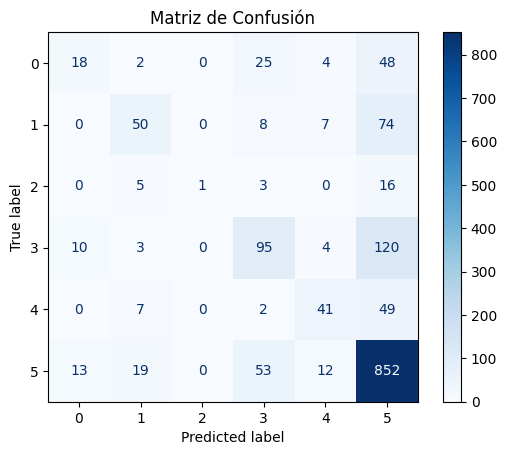

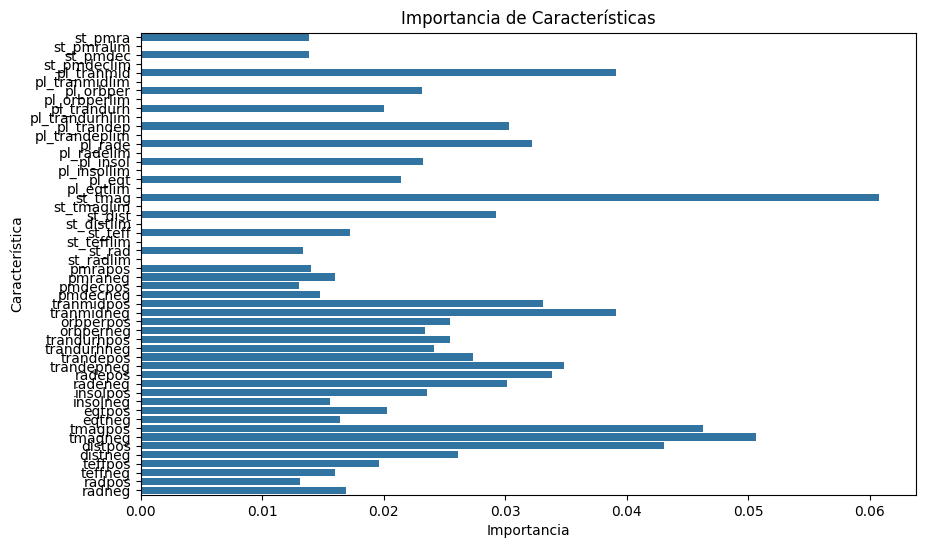

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Mostrar el reporte de clasificación
print(classification_report(test_y, pred_y))

# Matriz de confusión
cmp = confusion_matrix(test_y, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cmp)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

# Si quieres ver la importancia de las características:
importances = gbc.feature_importances_
features = train_X.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title('Importancia de Características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

In [36]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve

# Obtener las probabilidades (CORRECTO, da las probabilidades para CADA clase)
y_pred_proba = gbc.predict_proba(test_X)

# Calcular y graficar una curva por clase:
for i in range(len(gbc.classes_)):
    # Curva PR para la Clase i (test_y_binarized[:, i] es 1 o 0)
    precision, recall, thresholds = precision_recall_curve(test_y[:, i], y_pred_proba[:, i])
    # ... luego calculas y graficas el F1-score para esta clase ...
    #plt.plot(..., label=f'Clase {gb_clf.classes_[i]}')

KeyError: 'key of type tuple not found and not a MultiIndex'